IMPORTING THE LIBRARIES

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor



Set style for plots

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12


LOADING THE DATA

In [ ]:
try:
    df = pd.read_csv('global_street_food.csv')
    print("Data loaded successfully!")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print("Error: global_street_food.csv not found. Please ensure the file is in the correct directory.")
    exit()

Data loaded successfully!

First 5 rows of the dataset:
     Dish Name   Country Region/City  \
0     Takoyaki     Japan       Osaka   
1     Vada Pav     India      Mumbai   
2  Funnel Cake       USA       Texas   
3   Kathi Roll     India     Kolkata   
4     Pad Thai  Thailand     Bangkok   

                                         Ingredients  \
0  Octopus, Flour Batter, Bonito Flakes, Green On...   
1                 Potato, Spices, Bread Bun, Chutney   
2                                 Batter, Sugar, Oil   
3           Flatbread, Egg, Chicken, Onions, Chutney   
4    Rice Noodles, Tofu, Eggs, Peanuts, Bean Sprouts   

                                         Description Cooking Method  \
0  Crispy and hot, often served with sauces or ch...          Fried   
1  Crispy and hot, often served with sauces or ch...          Fried   
2  Crispy and hot, often served with sauces or ch...          Fried   
3         Charred to perfection with a smoky flavor.        Grilled   
4     Quick

DATA CLEANING

In [ ]:
print("\n--- Data Cleaning ---")
print("\nDataset Info:")
df.info()

print("\nMissing values before cleaning:")
print(df.isnull().sum())



--- Data Cleaning ---

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dish Name            4500 non-null   object 
 1   Country              4500 non-null   object 
 2   Region/City          4500 non-null   object 
 3   Ingredients          4500 non-null   object 
 4   Description          4500 non-null   object 
 5   Cooking Method       4500 non-null   object 
 6   Typical Price (USD)  4500 non-null   float64
 7   Vegetarian           4500 non-null   object 
dtypes: float64(1), object(7)
memory usage: 281.4+ KB

Missing values before cleaning:
Dish Name              0
Country                0
Region/City            0
Ingredients            0
Description            0
Cooking Method         0
Typical Price (USD)    0
Vegetarian             0
dtype: int64


DATA CLEANING


In [ ]:
print("\n--- Data Cleaning ---")
print("\nDataset Info:")
df.info()

print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Dropping rows with any missing values as a general cleaning step for simplicity
# You might choose more sophisticated imputation methods depending on the context
df.dropna(inplace=True)
print("\nMissing values after dropping rows with NaNs:")
print(df.isnull().sum())

print("\nNumber of duplicate rows before cleaning:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of duplicate rows after cleaning:", df.duplicated().sum())

# Ensure column names are clean (e.g., no leading/trailing spaces)
df.columns = df.columns.str.strip()

# Convert relevant columns to appropriate data types if necessary
# For example, if there's a 'Price' column that might be an object, convert it to numeric
# Let's check for 'Price' or 'Rating' columns and try to convert them.
# Assuming column names are likely to be 'Country', 'City', 'Dish', 'Description', 'Price', 'Rating' etc.

numerical_cols = []
for col in df.columns:
    if 'price' in col.lower() or 'cost' in col.lower():
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            numerical_cols.append(col)
            print(f"Converted '{col}' to numeric.")
        except:
            print(f"Could not convert '{col}' to numeric.")
    elif 'rating' in col.lower() or 'score' in col.lower():
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            numerical_cols.append(col)
            print(f"Converted '{col}' to numeric.")
        except:
            print(f"Could not convert '{col}' to numeric.")

# Drop rows where numerical conversion resulted in NaN
if numerical_cols:
    df.dropna(subset=numerical_cols, inplace=True)
    print(f"Dropped rows with NaN values in newly converted numerical columns: {numerical_cols}")


print("\nDataset info after cleaning and type conversions:")
df.info()


# EXPLORATORY DATA ANALYSIS (EDA)
print("\n--- Exploratory Data Analysis (EDA) ---")
print("\nBasic descriptive statistics for numerical columns:")
print(df.describe())

print("\nUnique values and counts for categorical columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: '{col}'")
    print(f"Number of unique values: {df[col].nunique()}")
    if df[col].nunique() < 50: # Only print value counts for columns with fewer than 50 unique values
        print(df[col].value_counts())
    else:
        print(f"Top 10 unique values:\n{df[col].value_counts().head(10)}")

# Find columns that might represent 'country', 'city', 'dish', 'type'
country_col = next((col for col in df.columns if 'country' in col.lower()), None)
city_col = next((col for col in df.columns if 'city' in col.lower()), None)
dish_col = next((col for col in df.columns if 'dish' in col.lower() or 'item' in col.lower() or 'food' in col.lower()), None)
type_col = next((col for col in df.columns if 'type' in col.lower() or 'category' in col.lower()), None)
price_col = next((col for col in df.columns if 'price' in col.lower() or 'cost' in col.lower()), None)
rating_col = next((col for col in df.columns if 'rating' in col.lower() or 'score' in col.lower()), None)



--- Data Cleaning ---

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dish Name            4500 non-null   object 
 1   Country              4500 non-null   object 
 2   Region/City          4500 non-null   object 
 3   Ingredients          4500 non-null   object 
 4   Description          4500 non-null   object 
 5   Cooking Method       4500 non-null   object 
 6   Typical Price (USD)  4500 non-null   float64
 7   Vegetarian           4500 non-null   object 
dtypes: float64(1), object(7)
memory usage: 281.4+ KB

Missing values before cleaning:
Dish Name              0
Country                0
Region/City            0
Ingredients            0
Description            0
Cooking Method         0
Typical Price (USD)    0
Vegetarian             0
dtype: int64

Missing values after dropping rows with NaNs:
Dish Name

DATA VISUALIZATION


--- Data Cleaning ---

Dataset Info before cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dish Name            4500 non-null   object 
 1   Country              4500 non-null   object 
 2   Region/City          4500 non-null   object 
 3   Ingredients          4500 non-null   object 
 4   Description          4500 non-null   object 
 5   Cooking Method       4500 non-null   object 
 6   Typical Price (USD)  4500 non-null   float64
 7   Vegetarian           4500 non-null   object 
dtypes: float64(1), object(7)
memory usage: 281.4+ KB

Missing values before cleaning:
Dish Name              0
Country                0
Region/City            0
Ingredients            0
Description            0
Cooking Method         0
Typical Price (USD)    0
Vegetarian             0
dtype: int64

Missing values after dropping rows with

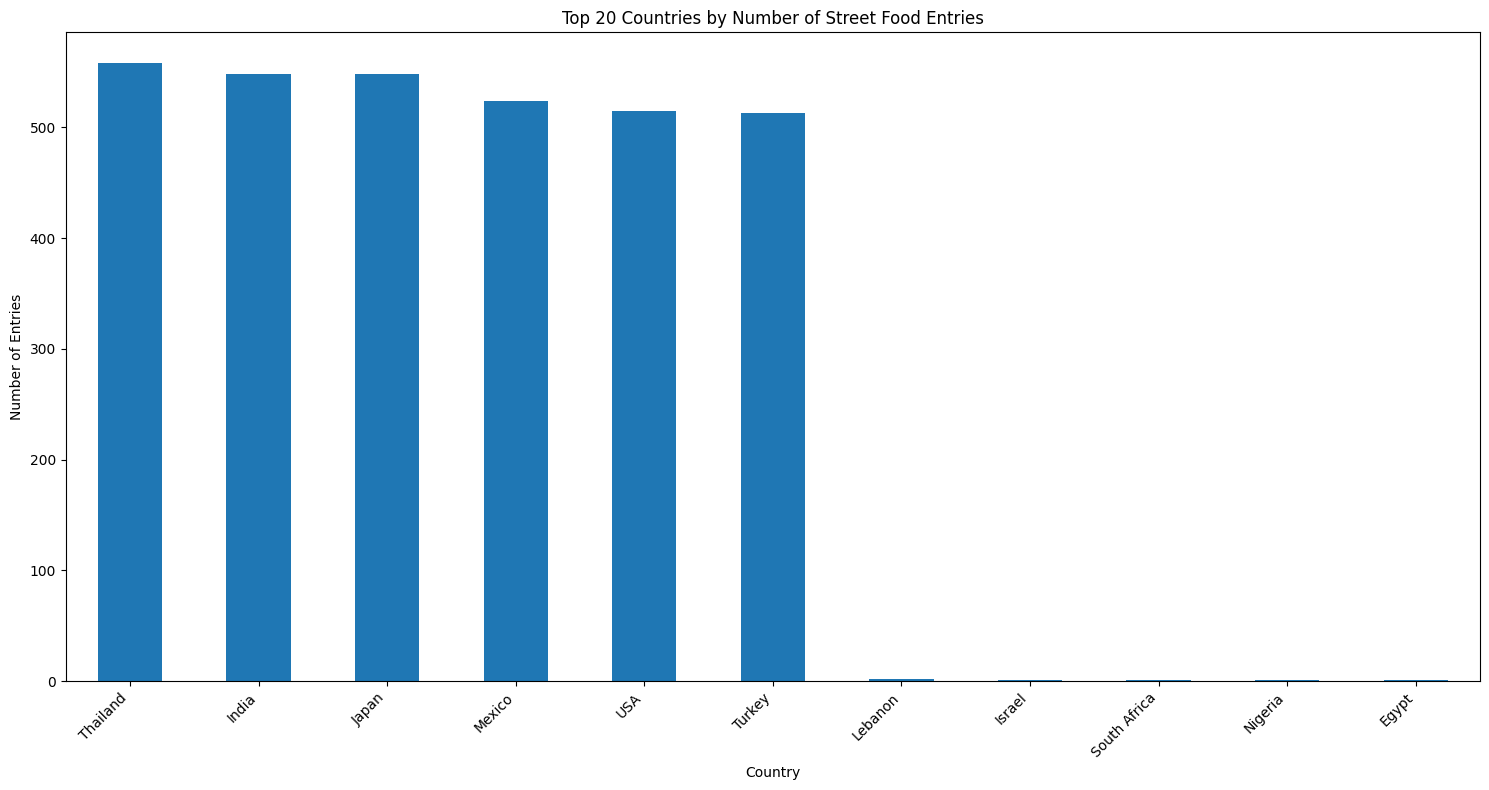

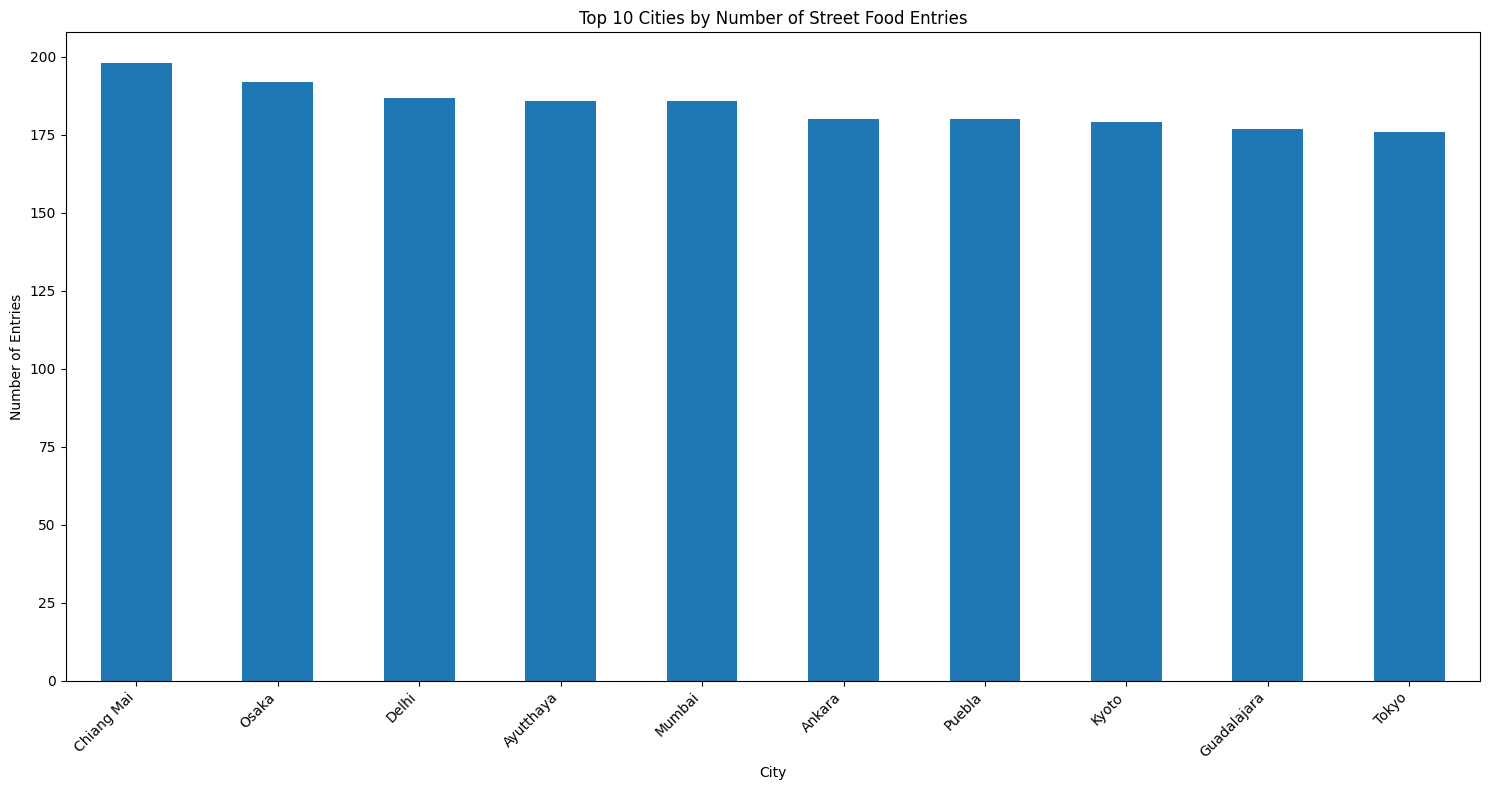

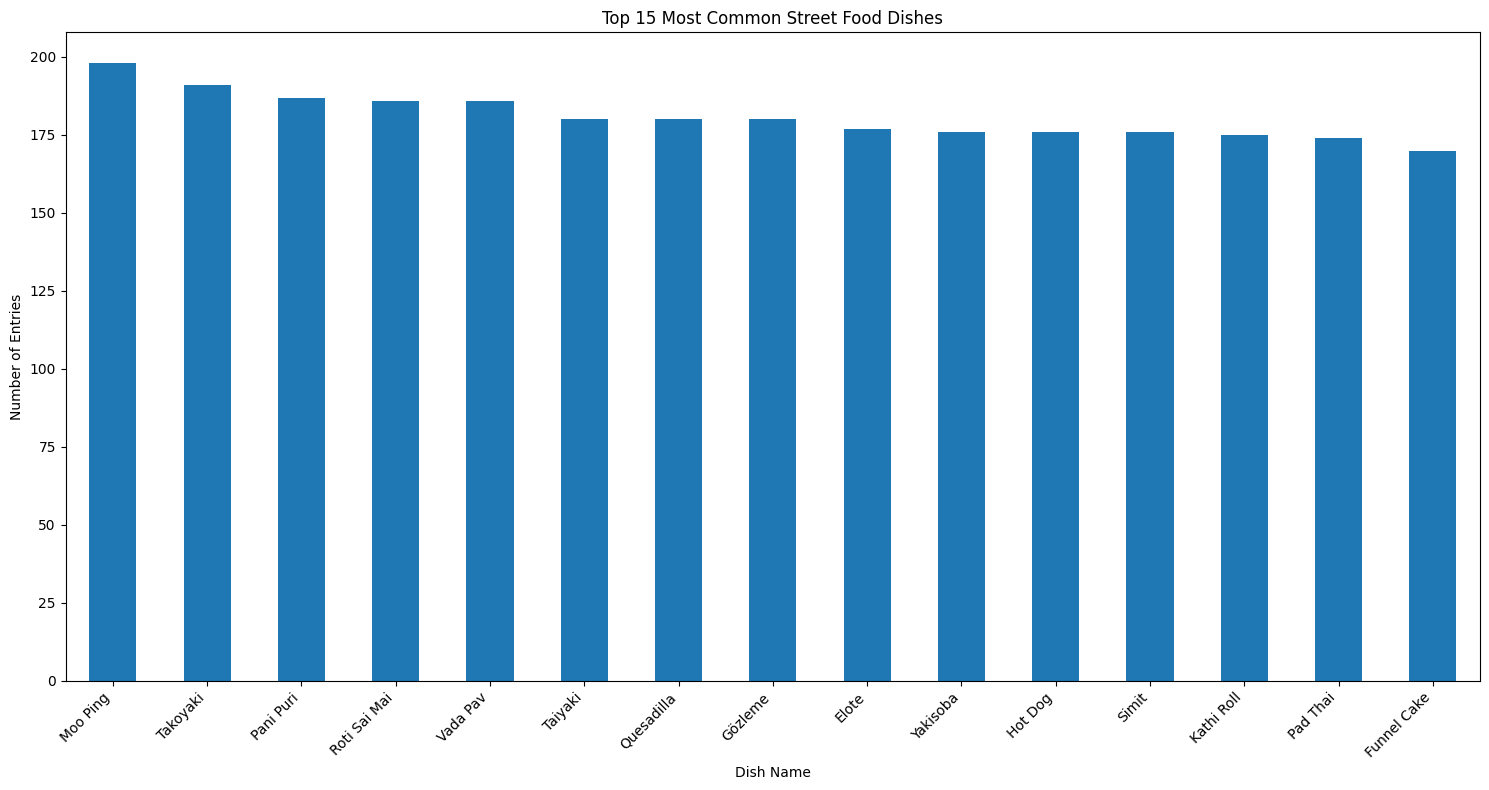

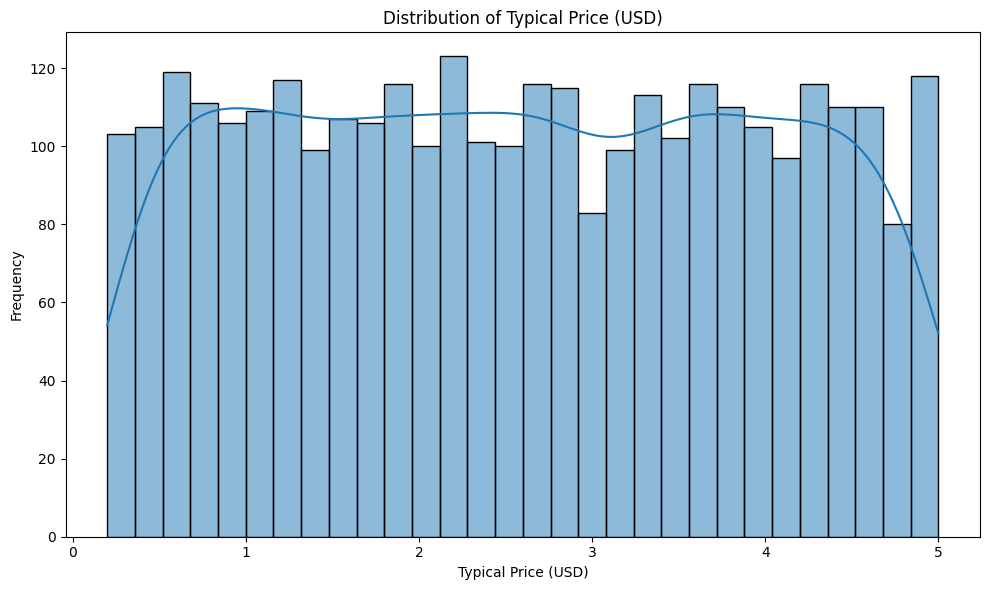

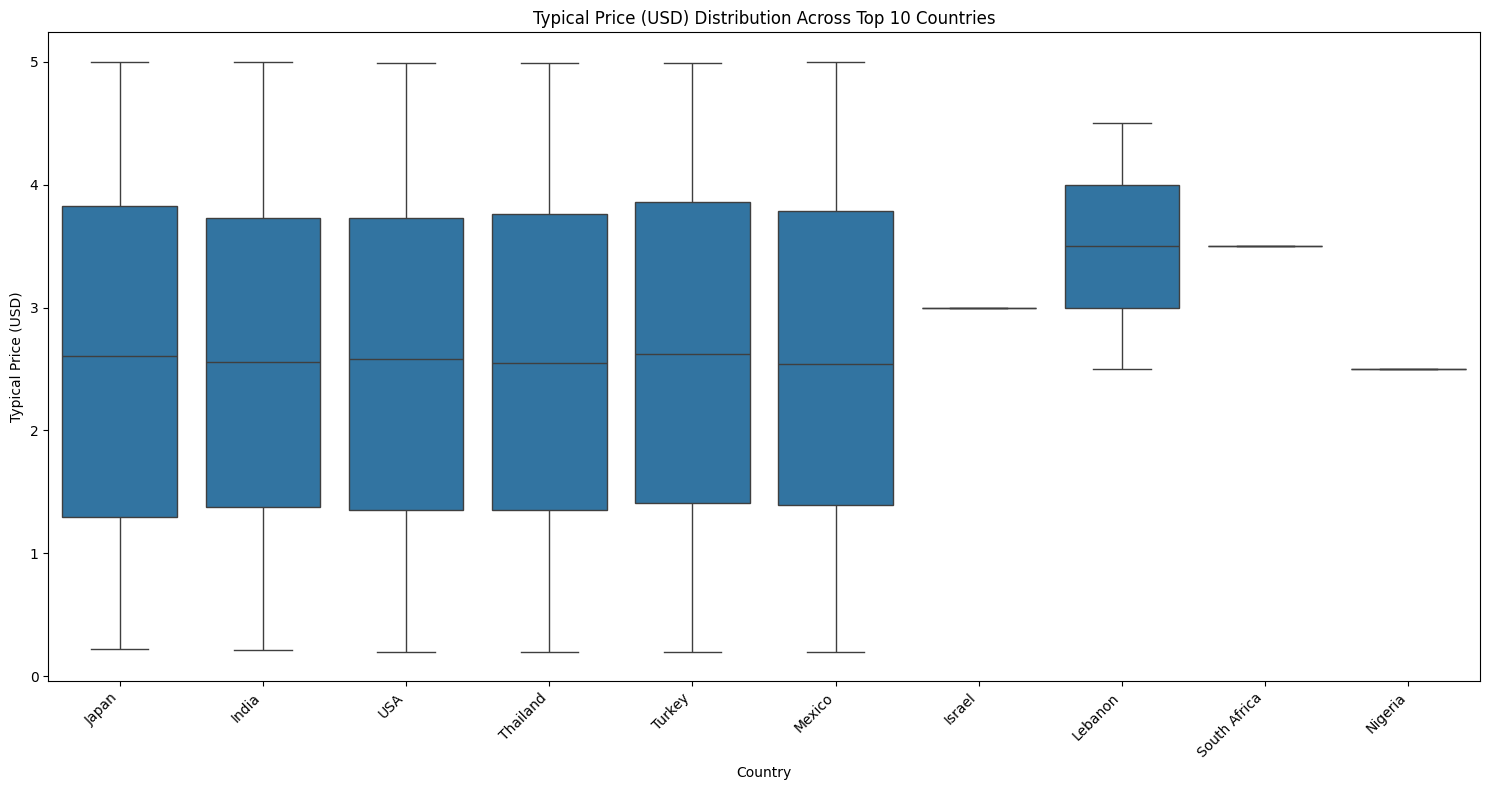


--- Feature Relationships ---

Not enough numerical features to plot a correlation matrix.

--- Machine Learning Part ---
For this dataset, a clear predictive target (like smartphone price) is not immediately apparent.
Instead, we can explore clustering or patterns based on available features.

Attempting to cluster countries based on available numerical features (e.g., average price, average rating).


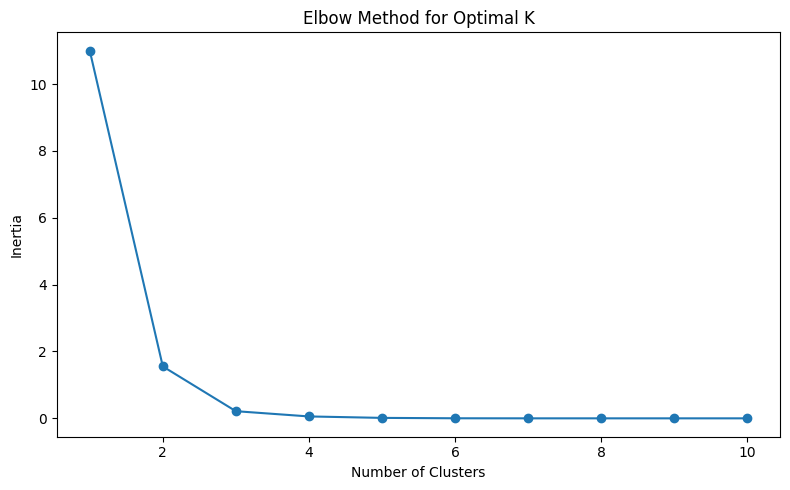


Countries clustered into 3 groups based on ['Typical Price (USD)']:
              Cluster  Typical Price (USD)
Country                                   
Egypt               2             2.800000
India               1             2.568723
Israel              2             3.000000
Japan               1             2.582500
Lebanon             0             3.500000
Mexico              1             2.565172
Nigeria             1             2.500000
South Africa        0             3.500000
Thailand            1             2.580932
Turkey              1             2.615556
USA                 1             2.569087

--- Customer Review - Sentimental Analysis ---
If a 'description' or 'review' column exists, sentiment analysis could be performed.
This would typically involve Natural Language Processing (NLP) techniques.

Example (conceptual):
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0: return 'Pos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and clean the data (copied from cell 1CJa0pEcROed)
# Assuming the data is in a CSV file named 'street_food_data.csv' in the /tmp directory
try:
    df = pd.read_csv('/content/global_street_food.csv')
except FileNotFoundError:
    print("Error: street_food_data.csv not found. Please make sure the file is in the /tmp directory.")
    # Handle the error without exiting, allowing the rest of the cell to run (will likely error out later)
    df = None # Set df to None or an empty DataFrame to avoid NameError later if possible

if df is not None:
    print("\n--- Data Cleaning ---")
    print("\nDataset Info before cleaning:")
    df.info()

    print("\nMissing values before cleaning:")
    print(df.isnull().sum())

    # Dropping rows with any missing values as a general cleaning step for simplicity
    df.dropna(inplace=True)
    print("\nMissing values after dropping rows with NaNs:")
    print(df.isnull().sum())

    print("\nNumber of duplicate rows before cleaning:", df.duplicated().sum())
    df.drop_duplicates(inplace=True)
    print("Number of duplicate rows after cleaning:", df.duplicated().sum())

    # Ensure column names are clean (e.g., no leading/trailing spaces)
    df.columns = df.columns.str.strip()

    # Convert relevant columns to appropriate data types if necessary
    numerical_cols = []
    for col in df.columns:
        if 'price' in col.lower() or 'cost' in col.lower():
            try:
                df[col] = pd.to_numeric(df[col], errors='coerce')
                numerical_cols.append(col)
                print(f"Converted '{col}' to numeric.")
            except:
                print(f"Could not convert '{col}' to numeric.")
        elif 'rating' in col.lower() or 'score' in col.lower():
            try:
                df[col] = pd.to_numeric(df[col], errors='coerce')
                numerical_cols.append(col)
                print(f"Converted '{col}' to numeric.")
            except:
                print(f"Could not convert '{col}' to numeric.")

    # Drop rows where numerical conversion resulted in NaN
    if numerical_cols:
        df.dropna(subset=numerical_cols, inplace=True)
        print(f"Dropped rows with NaN values in newly converted numerical columns: {numerical_cols}")

    print("\nDataset info after cleaning and type conversions:")
    df.info()


    # Find columns that might represent 'country', 'city', 'dish', 'type'
    country_col = next((col for col in df.columns if 'country' in col.lower()), None)
    city_col = next((col for col in df.columns if 'city' in col.lower()), None)
    dish_col = next((col for col in df.columns if 'dish' in col.lower() or 'item' in col.lower() or 'food' in col.lower()), None)
    type_col = next((col for col in df.columns if 'type' in col.lower() or 'category' in col.lower()), None)
    price_col = next((col for col in df.columns if 'price' in col.lower() or 'cost' in col.lower()), None)
    rating_col = next((col for col in df.columns if 'rating' in col.lower() or 'score' in col.lower()), None)


    print("\n--- Data Visualization ---")

    if country_col:
        plt.figure(figsize=(15, 8))
        df[country_col].value_counts().head(20).plot(kind='bar')
        plt.title(f'Top 20 Countries by Number of Street Food Entries')
        plt.xlabel('Country')
        plt.ylabel('Number of Entries')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    if city_col and country_col:
        # Top 10 cities overall
        plt.figure(figsize=(15, 8))
        df[city_col].value_counts().head(10).plot(kind='bar')
        plt.title(f'Top 10 Cities by Number of Street Food Entries')
        plt.xlabel('City')
        plt.ylabel('Number of Entries')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    if dish_col:
        plt.figure(figsize=(15, 8))
        df[dish_col].value_counts().head(15).plot(kind='bar')
        plt.title(f'Top 15 Most Common Street Food Dishes')
        plt.xlabel('Dish Name')
        plt.ylabel('Number of Entries')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    if type_col:
        plt.figure(figsize=(10, 7))
        df[type_col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of Street Food Types')
        plt.xlabel('Food Type')
        plt.ylabel('Number of Entries')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    if price_col:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[price_col], kde=True, bins=30)
        plt.title(f'Distribution of {price_col}')
        plt.xlabel(price_col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

        if country_col:
            # Average price by top 10 countries
            top_countries = df[country_col].value_counts().head(10).index
            df_filtered = df[df[country_col].isin(top_countries)]
            plt.figure(figsize=(15, 8))
            sns.boxplot(x=country_col, y=price_col, data=df_filtered)
            plt.title(f'{price_col} Distribution Across Top 10 Countries')
            plt.xlabel('Country')
            plt.ylabel(price_col)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

    if rating_col:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[rating_col], kde=True, bins=10)
        plt.title(f'Distribution of {rating_col}')
        plt.xlabel(rating_col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

    # FEATURE RELATIONSHIPS / CORRELATION BETWEEN FEATURES
    print("\n--- Feature Relationships ---")
    # Check for numerical columns again after potential conversions
    numerical_cols_for_corr = df.select_dtypes(include=np.number).columns.tolist()

    if len(numerical_cols_for_corr) > 1:
        print("\nCorrelation Matrix for Numerical Features:")
        print(df[numerical_cols_for_corr].corr())
        plt.figure(figsize=(8, 6))
        sns.heatmap(df[numerical_cols_for_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix of Numerical Features')
        plt.tight_layout()
        plt.show()
    else:
        print("\nNot enough numerical features to plot a correlation matrix.")


    # Average price per food type (if 'type' and 'price' columns exist)
    if type_col and price_col:
        print(f"\nAverage {price_col} per {type_col}:")
        avg_price_by_type = df.groupby(type_col)[price_col].mean().sort_values(ascending=False)
        print(avg_price_by_type)

        plt.figure(figsize=(12, 7))
        avg_price_by_type.head(10).plot(kind='bar')
        plt.title(f'Average {price_col} for Top 10 Food {type_col}s')
        plt.xlabel(type_col)
        plt.ylabel(f'Average {price_col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


    # MACHINE LEARNING PART (Conceptual for Street Food Data)
    print("\n--- Machine Learning Part ---")
    print("For this dataset, a clear predictive target (like smartphone price) is not immediately apparent.")
    print("Instead, we can explore clustering or patterns based on available features.")

    # Example: Clustering countries based on average price/rating (if applicable)
    if country_col and (price_col or rating_col):
        print("\nAttempting to cluster countries based on available numerical features (e.g., average price, average rating).")
        features_for_clustering = []
        if price_col:
            features_for_clustering.append(price_col)
        if rating_col:
            features_for_clustering.append(rating_col)

        if features_for_clustering:
            country_agg = df.groupby(country_col)[features_for_clustering].mean().dropna()

            if len(country_agg) > 1 and len(features_for_clustering) > 0:
                from sklearn.preprocessing import StandardScaler
                from sklearn.cluster import KMeans

                scaler = StandardScaler()
                scaled_features = scaler.fit_transform(country_agg)

                # Determine optimal number of clusters using Elbow Method (simplified)
                inertia = []
                max_clusters = min(10, len(country_agg) - 1) # Don't try to make more clusters than data points
                if max_clusters > 1:
                    for i in range(1, max_clusters + 1):
                        kmeans = KMeans(n_clusters=i, random_state=42, n_init=10) # n_init for newer sklearn versions
                        kmeans.fit(scaled_features)
                        inertia.append(kmeans.inertia_)

                    plt.figure(figsize=(8, 5))
                    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
                    plt.title('Elbow Method for Optimal K')
                    plt.xlabel('Number of Clusters')
                    plt.ylabel('Inertia')
                    plt.tight_layout()
                    plt.show()

                    # Choose a 'k' based on the elbow plot (e.g., visually pick a good elbow)
                    # For demonstration, let's pick k=3 if possible, or adjust based on data
                    n_clusters_chosen = min(3, max_clusters) # Example: try 3 clusters

                    if n_clusters_chosen > 0:
                        kmeans = KMeans(n_clusters=n_clusters_chosen, random_state=42, n_init=10)
                        country_agg['Cluster'] = kmeans.fit_predict(scaled_features)
                        print(f"\nCountries clustered into {n_clusters_chosen} groups based on {features_for_clustering}:")
                        print(country_agg[['Cluster'] + features_for_clustering])

                        if len(features_for_clustering) == 2:
                            plt.figure(figsize=(10, 7))
                            sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=country_agg['Cluster'], palette='viridis', s=100)
                            plt.title(f'Country Clusters based on {features_for_clustering[0]} and {features_for_clustering[1]}')
                            plt.xlabel(f'Scaled {features_for_clustering[0]}')
                            plt.ylabel(f'Scaled {features_for_clustering[1]}')
                            plt.tight_layout()
                            plt.show()
                    else:
                        print("Not enough countries to perform clustering with chosen K.")
                else:
                    print("Not enough data points to perform clustering with multiple clusters.")
            else:
                print("Not enough unique countries or features to perform clustering.")
        else:
            print("No suitable numerical features found for clustering.")
    else:
        print("Could not find 'country' column or suitable numerical features for clustering.")


    # CUSTOMER REVIEW - SENTIMENTAL ANALYSIS (Conceptual for Street Food Data)
    print("\n--- Customer Review - Sentimental Analysis ---")
    description_col = next((col for col in df.columns if 'description' in col.lower()), None)

    if description_col:
        print("If a 'description' or 'review' column exists, sentiment analysis could be performed.")
        print("This would typically involve Natural Language Processing (NLP) techniques.")
        print("\nExample (conceptual):")
        print("from textblob import TextBlob")
        print("def get_sentiment(text):")
        print("    analysis = TextBlob(str(text))")
        print("    if analysis.sentiment.polarity > 0: return 'Positive'")
        print("    elif analysis.sentiment.polarity < 0: return 'Negative'")
        print("    else: return 'Neutral'")
        print(f"# df['Sentiment'] = df['{description_col}'].apply(get_sentiment)")
        print("# print(df['Sentiment'].value_counts())")
        print("\nSkipping actual execution as it requires NLTK downloads and can be time-consuming for large text data.")
    else:
        print("No 'description' or 'review' column found for sentiment analysis.")

    print("\n--- Analysis Complete ---")
    print("Further analysis could involve more specific questions once the data structure is fully understood.")